No.1-1


In [1]:
import numpy as np

X = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
a = np.array([0.4, 0.2, 0.1])

m = X.mean(axis=0)

y = np.dot(a, X)

(m, y)


(array([5., 6., 7., 8.]), array([2.3, 3. , 3.7, 4.4]))

No.1-2

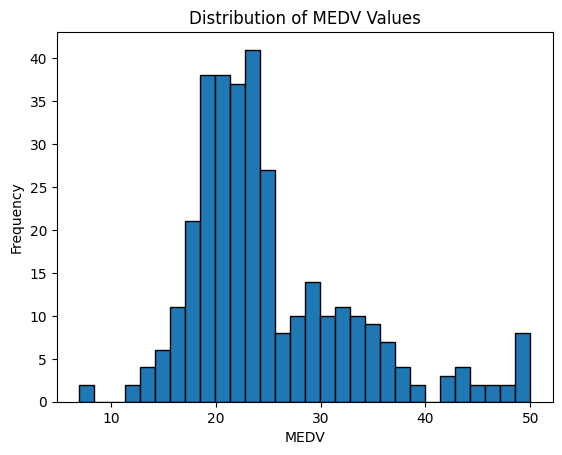

25.070870870870866

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

boston_df = pd.read_csv('boston.csv')

filtered_df = boston_df[boston_df['CRIM'] < 1.0]

medv_mean = filtered_df['MEDV'].mean()

plt.hist(filtered_df['MEDV'], bins=30, edgecolor='black')
plt.title('Distribution of MEDV Values')
plt.xlabel('MEDV')
plt.ylabel('Frequency')

plt.show()

medv_mean


No.1-3

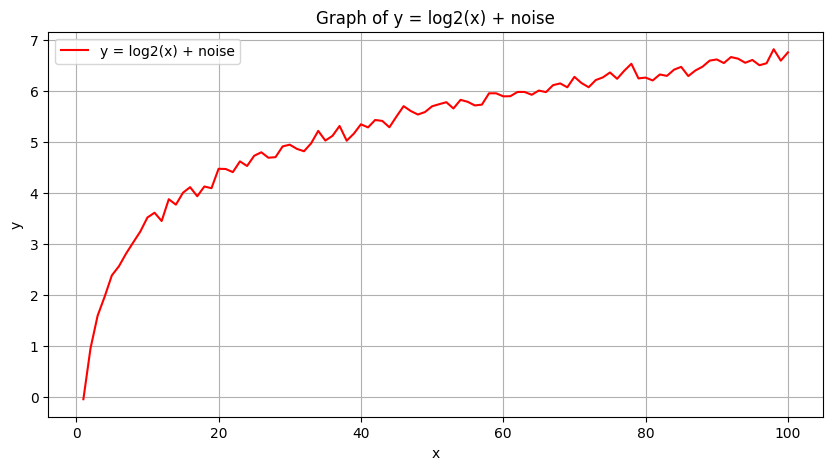

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 101)

y = np.log2(x[1:])

noise = np.random.normal(0, 0.1, size=y.shape)
y_noisy = y + noise

plt.figure(figsize=(10,5))
plt.plot(x[1:], y_noisy, 'r', label='y = log2(x) + noise')
plt.title('Graph of y = log2(x) + noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


No.1-4

In [5]:
from sklearn.linear_model import LinearRegression

data = {
    'Study hours': [7.0, 3.5, 8.5, 1.0, 5.0],
    'Sleep hours': [9.0, 4.0, 2.5, 9.5, 5.0],
    'Score': [91, 54, 77, 26, 65]
}

df = pd.DataFrame(data)

X = df[['Study hours', 'Sleep hours']]
y = df['Score']

model = LinearRegression()

model.fit(X, y)

predicted_score = model.predict([[2, 2]])

predicted_score[0]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.346589048571946

No.2

Supervised Learning is a type of machine learning where the model is trained on a labeled dataset, which means that each training example is paired with an output label. The model learns to make predictions based on this data. It is commonly used for tasks such as regression (predicting a continuous output) and classification (predicting a discrete output).

Unsupervised Learning, on the other hand, involves training a model on data that does not have labeled responses. The model tries to learn the underlying patterns and structure from the data without any guidance on what the output should be. Common unsupervised learning tasks include clustering (grouping similar instances together) and dimensionality reduction (simplifying the data without losing important information).

Reinforcement Learning is a type of learning where an agent learns to make decisions by performing certain actions and observing the rewards or penalties from those actions. It is different from supervised and unsupervised learning in that the learning process is based on interaction with the environment and is aimed at long-term goals. Reinforcement learning is commonly used in areas such as robotics, games, and navigation where an agent must make a sequence of decisions that lead to a reward.

The key differences among these learning paradigms are:
•	Supervised Learning uses labeled data to train models.
•	Unsupervised Learning works with unlabeled data and aims to find structure within the data.
•	Reinforcement Learning interacts with an environment to learn policies for achieving long-term goals.


No.3

Overfitting in supervised learning occurs when a model learns not only the underlying patterns in the training data but also the noise and random fluctuations to an extent that it negatively impacts the performance of the model on new, unseen data. Essentially, an overfitted model is too complex and too closely fit to the training dataset, resulting in poor generalization to other datasets.

To prevent overfitting in supervised learning, you can use several techniques:

1.	Simplify the Model: Use a simpler model with fewer parameters or less complexity. This can be achieved by reducing the number of features, using linear models instead of high-degree polynomial models, or applying techniques like dimensionality reduction.
2.	Cross-Validation: Instead of using the entire dataset for training, use a portion for training and another portion for validation. Cross-validation, such as k-fold cross-validation, allows you to test the model's performance on unseen data and ensures that the model generalizes well.
3.	Regularization: Techniques such as L1 (Lasso) and L2 (Ridge) regularization add a penalty for larger coefficients to the loss function. This discourages the model from fitting too closely to the training data and promotes simpler models that generalize better.
4.	Early Stopping: During the training process, you can monitor the performance of the model on a validation set and stop the training once the performance begins to degrade, which is a sign that the model might be starting to overfit.
5.	Pruning: In certain models, like decision trees, you can remove branches that have little importance and are likely to be noise. This process is known as pruning and can lead to simpler and more general models.
6.	Ensemble Methods: Combining the predictions of several models can reduce the risk of overfitting. Techniques like bagging and boosting help in forming a more robust model by aggregating the results of multiple models.
7.	Data Augmentation: Increasing the size of the training set using data augmentation can help in preventing overfitting, especially in domains like computer vision where it is possible to generate new training samples by altering the existing ones in realistic ways.
8.	Including More Data: If possible, increasing the amount of training data can help the model to generalize better and reduce overfitting.


No.4

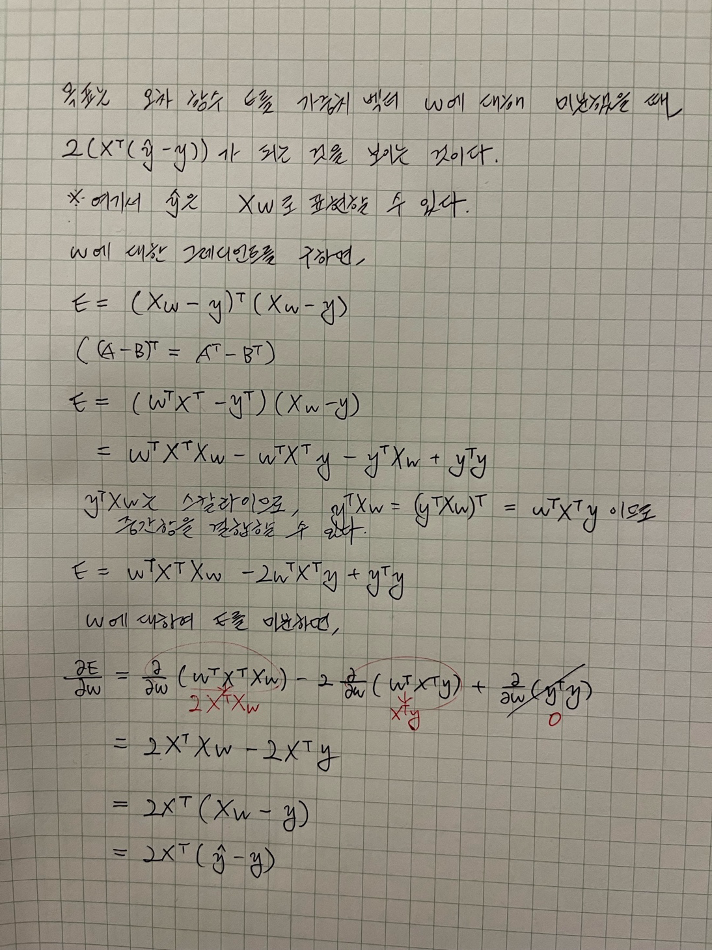

No.5

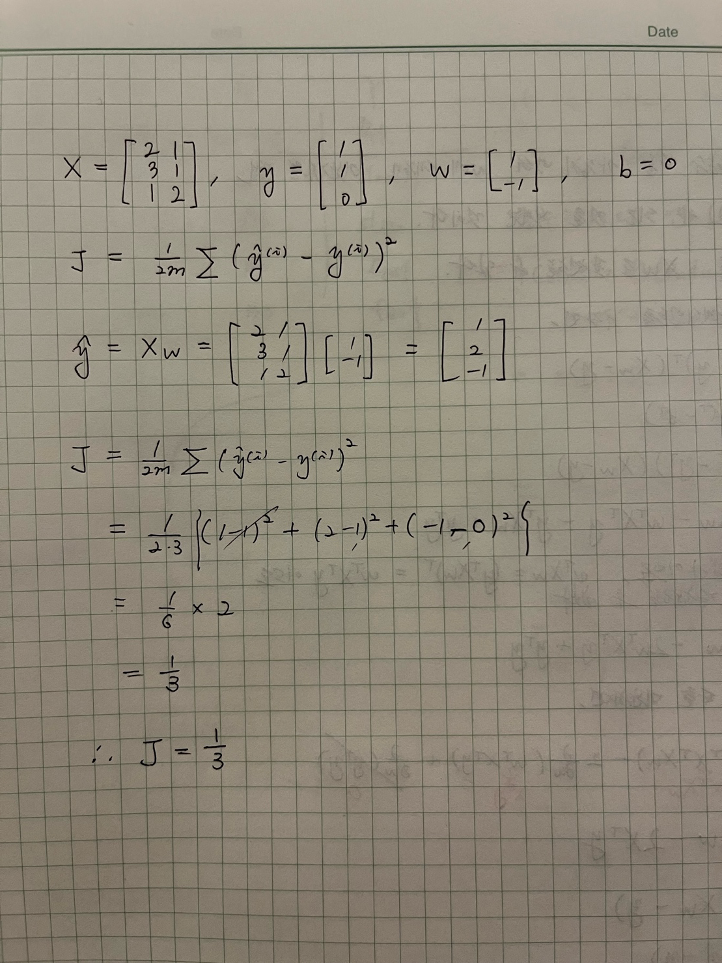

No.6

In [ ]:
df = pd.read_csv('heart_disease.csv')

df['num'] = df['num'].apply(lambda x: 1 if x >= 1 else 0)

def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

In [11]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(model)

            # Compute the cost
            cost = (-1/n_samples) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            self.cost_history.append(cost)

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_prob(self, X):
        model = np.dot(X, self.weights) + self.bias
        return sigmoid(model)

    def predict(self, X):
        probabilities = self.predict_prob(X)
        return [1 if i > 0.5 else 0 for i in probabilities]
    
    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


In [12]:
X = df.drop('num', axis=1).values
y = df['num'].values

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std


In [13]:
model = CustomLogisticRegression(learning_rate=0.01, iterations=1000)

model.fit(X, y)

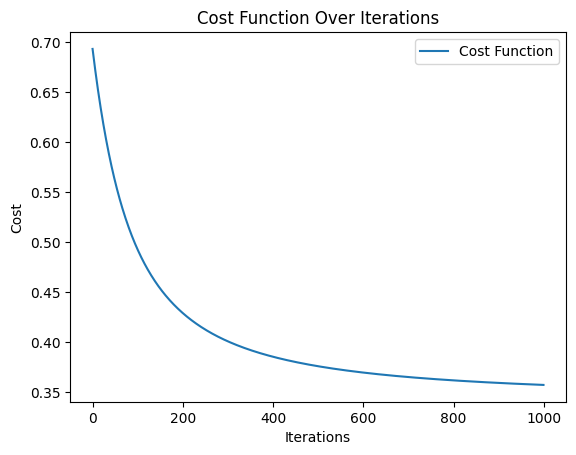

In [14]:
plt.plot(range(model.iterations), model.cost_history, label='Cost Function')
plt.title('Cost Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [15]:
predictions = model.predict(X)
accuracy = model.accuracy(y, predictions)
print(f'Training Accuracy: {accuracy * 100:.2f}%')

Training Accuracy: 84.51%


In [16]:
new_patient = np.array([[61, 0, 3, 154, 210, 1, 0, 130, 0, 1.5, 2, 2, 3]])
new_patient = (new_patient - X_mean) / X_std  # Standardize patient data
prediction = model.predict(new_patient)
prob = model.predict_prob(new_patient)

print(f'Predicted class for the new patient: {prediction[0]}')
print(f'Probability of having heart disease for the new patient: {prob[0]:.4f}')

Predicted class for the new patient: 0
Probability of having heart disease for the new patient: 0.4129
